In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from explanation_method.explanation_method import ExplanationMethod
from IPython.display import HTML, Image

In [4]:
# name of both the directory in \data\{alef_service} and the database name in the neo4j GDBMS
decision_name = 'belastingrente'
explanation_method = ExplanationMethod.from_decision_name(decision_name)
ge = explanation_method.global_explanation
le = explanation_method.local_explanation

In [5]:
# explanation_method.delete_all_graph()

In [6]:
HTML(f"""
    <div style="display: flex; align-items: flex-start;">
            <img src={"../explanation_method/media/relations.png"} style="width:35%"> </img>
            <img src={"../explanation_method/media/nodes.png"} style="width:35%"> </img>
    </div>
    """)

### Explanation - Modelling expert

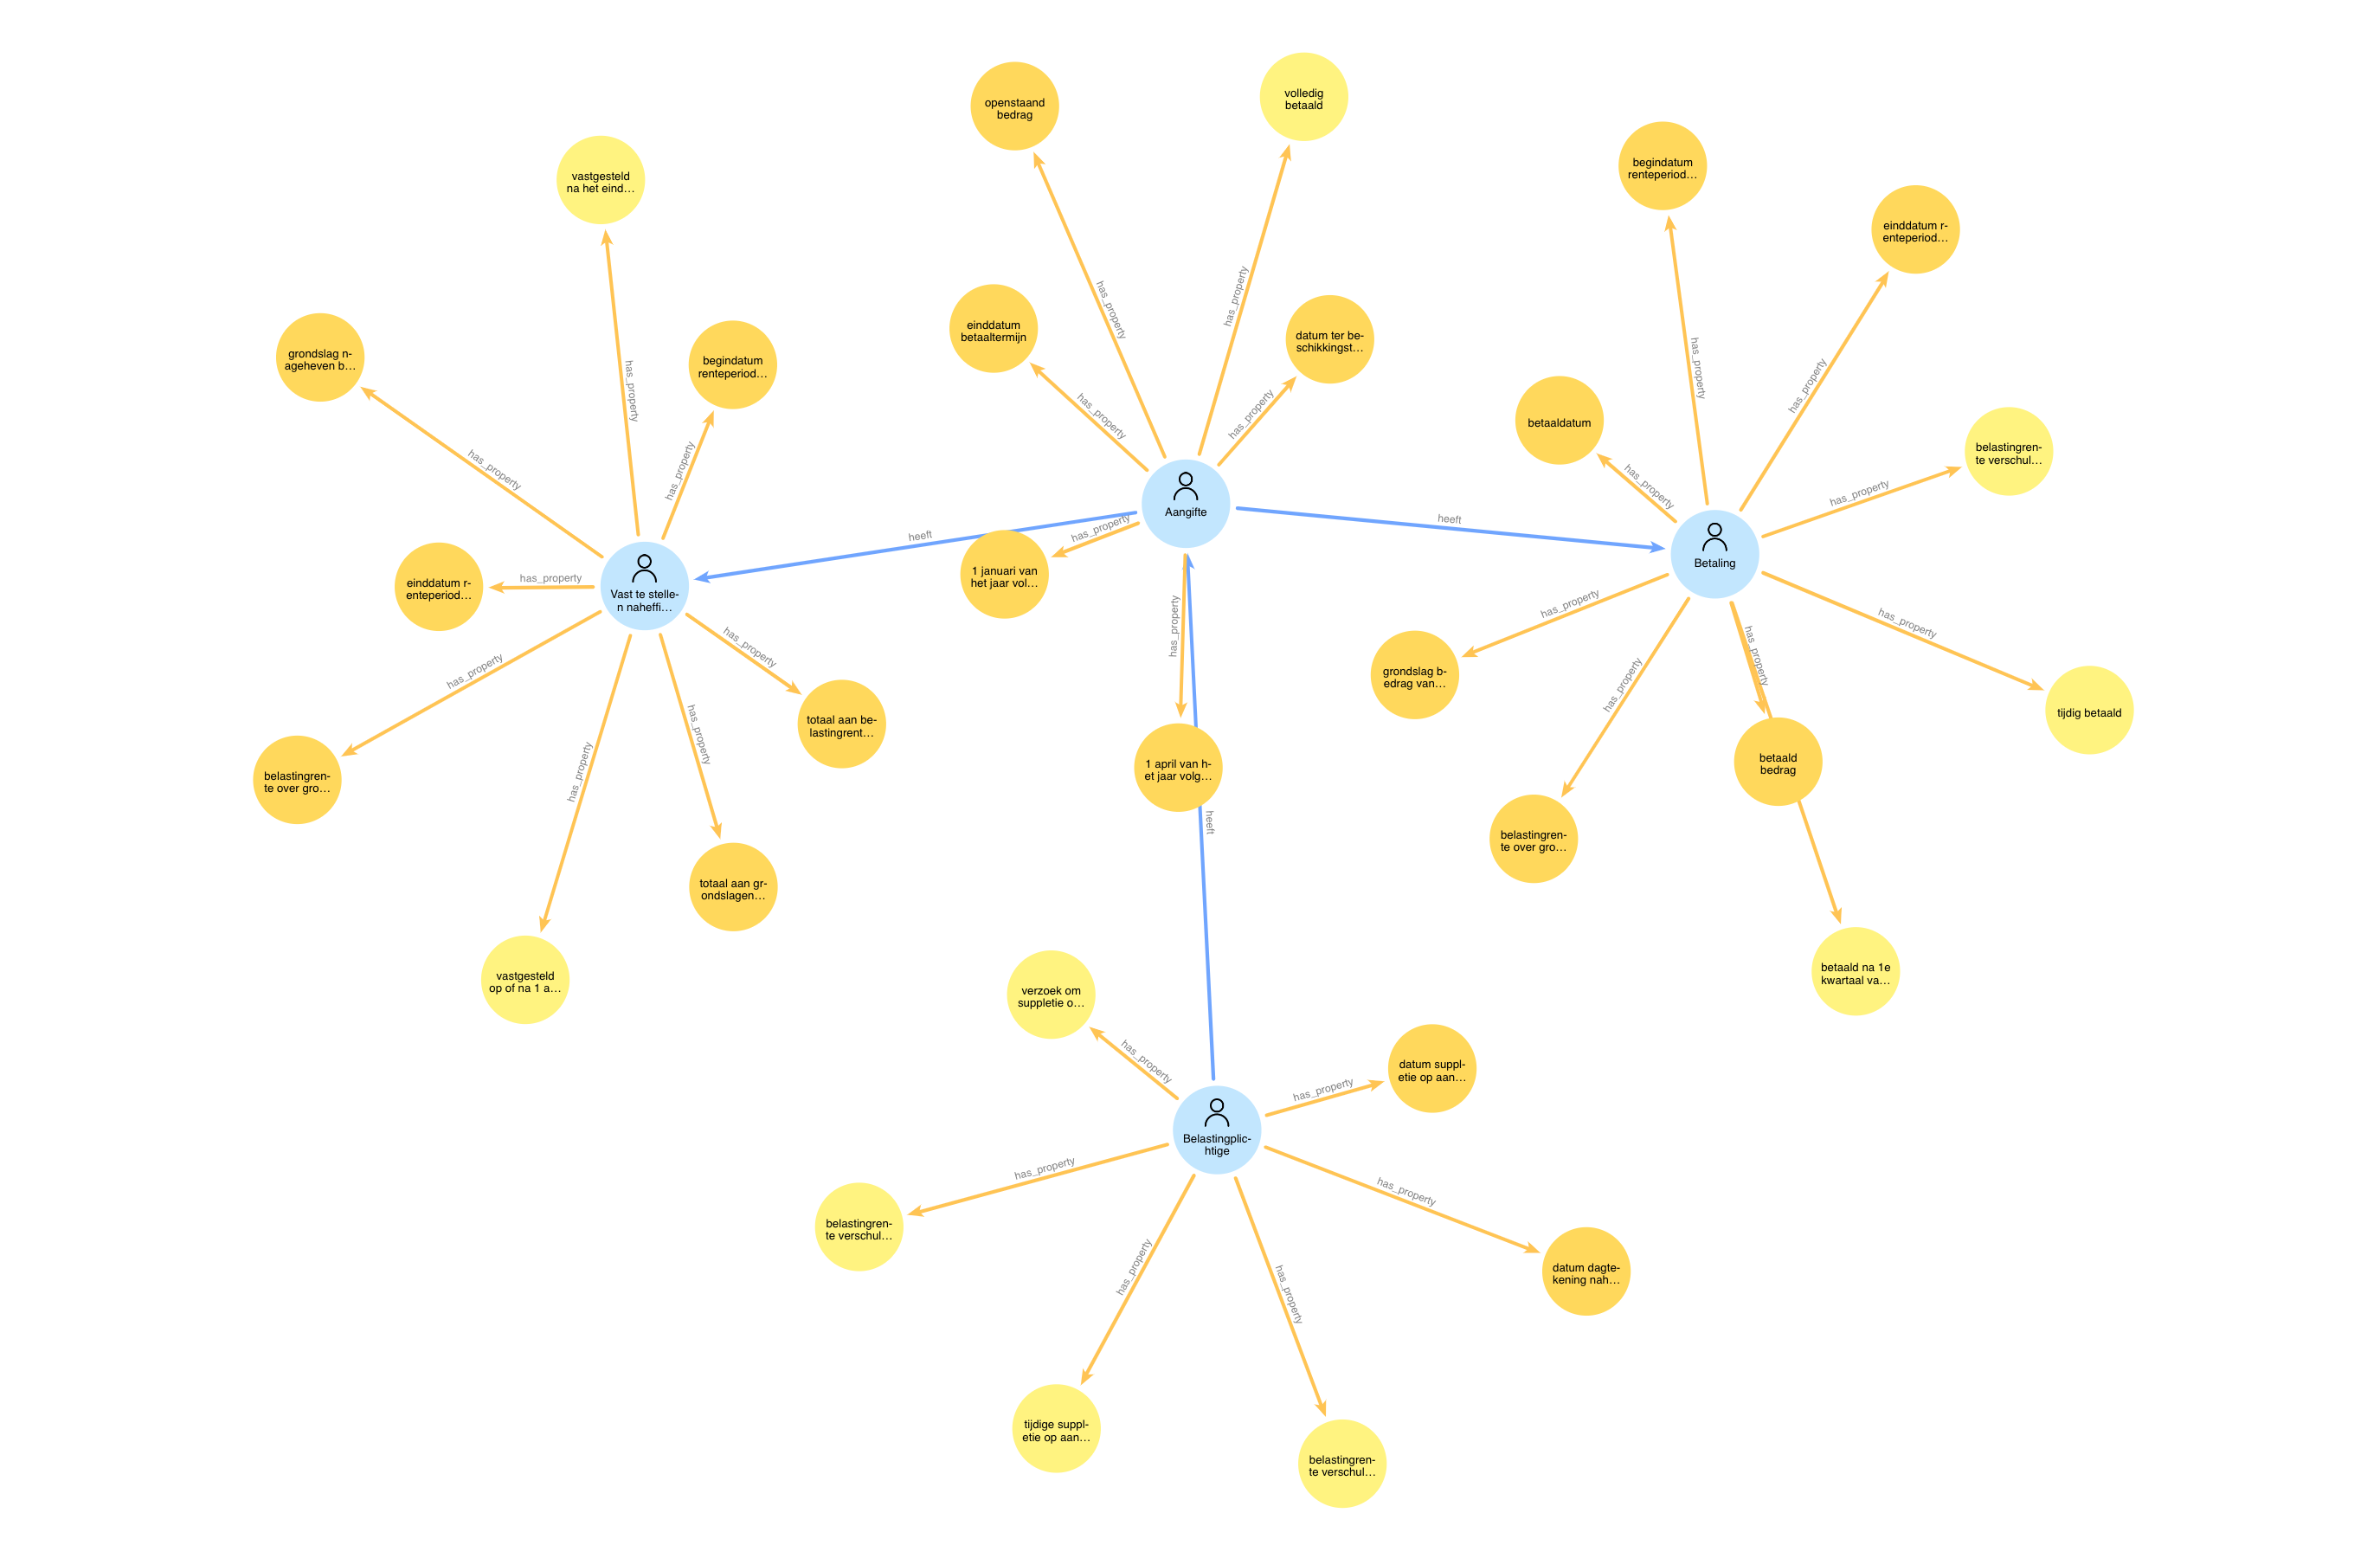

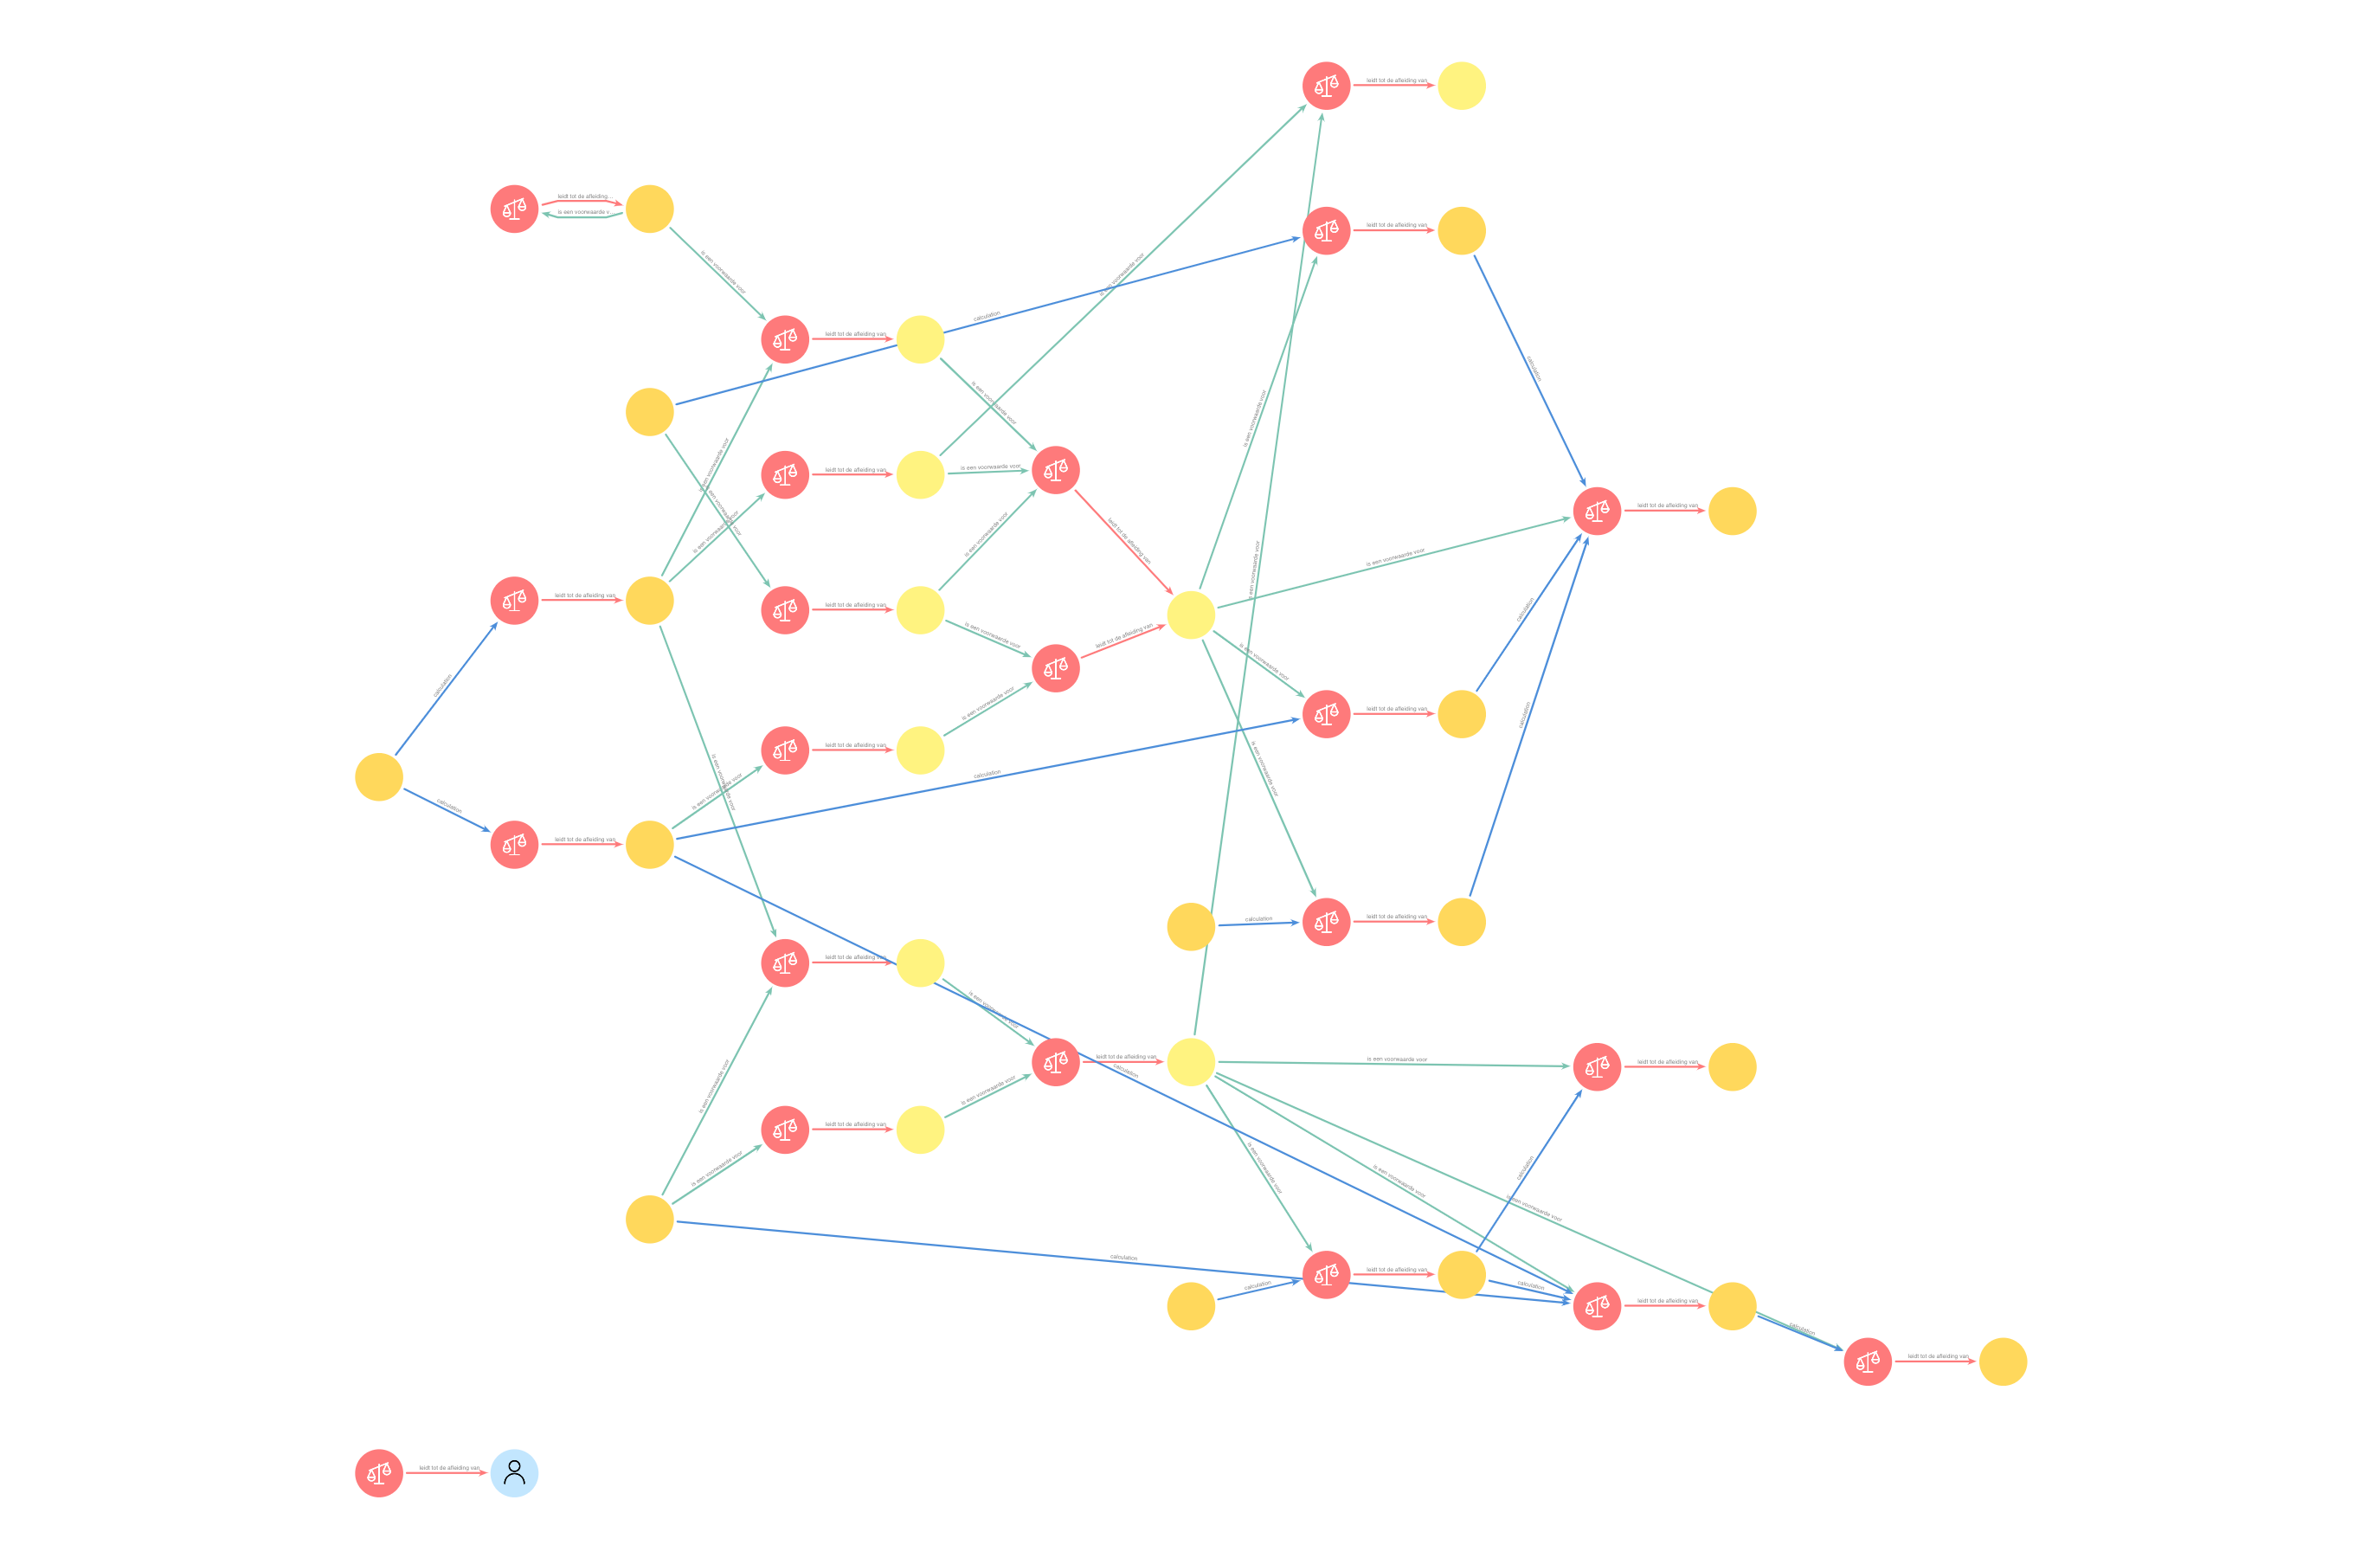

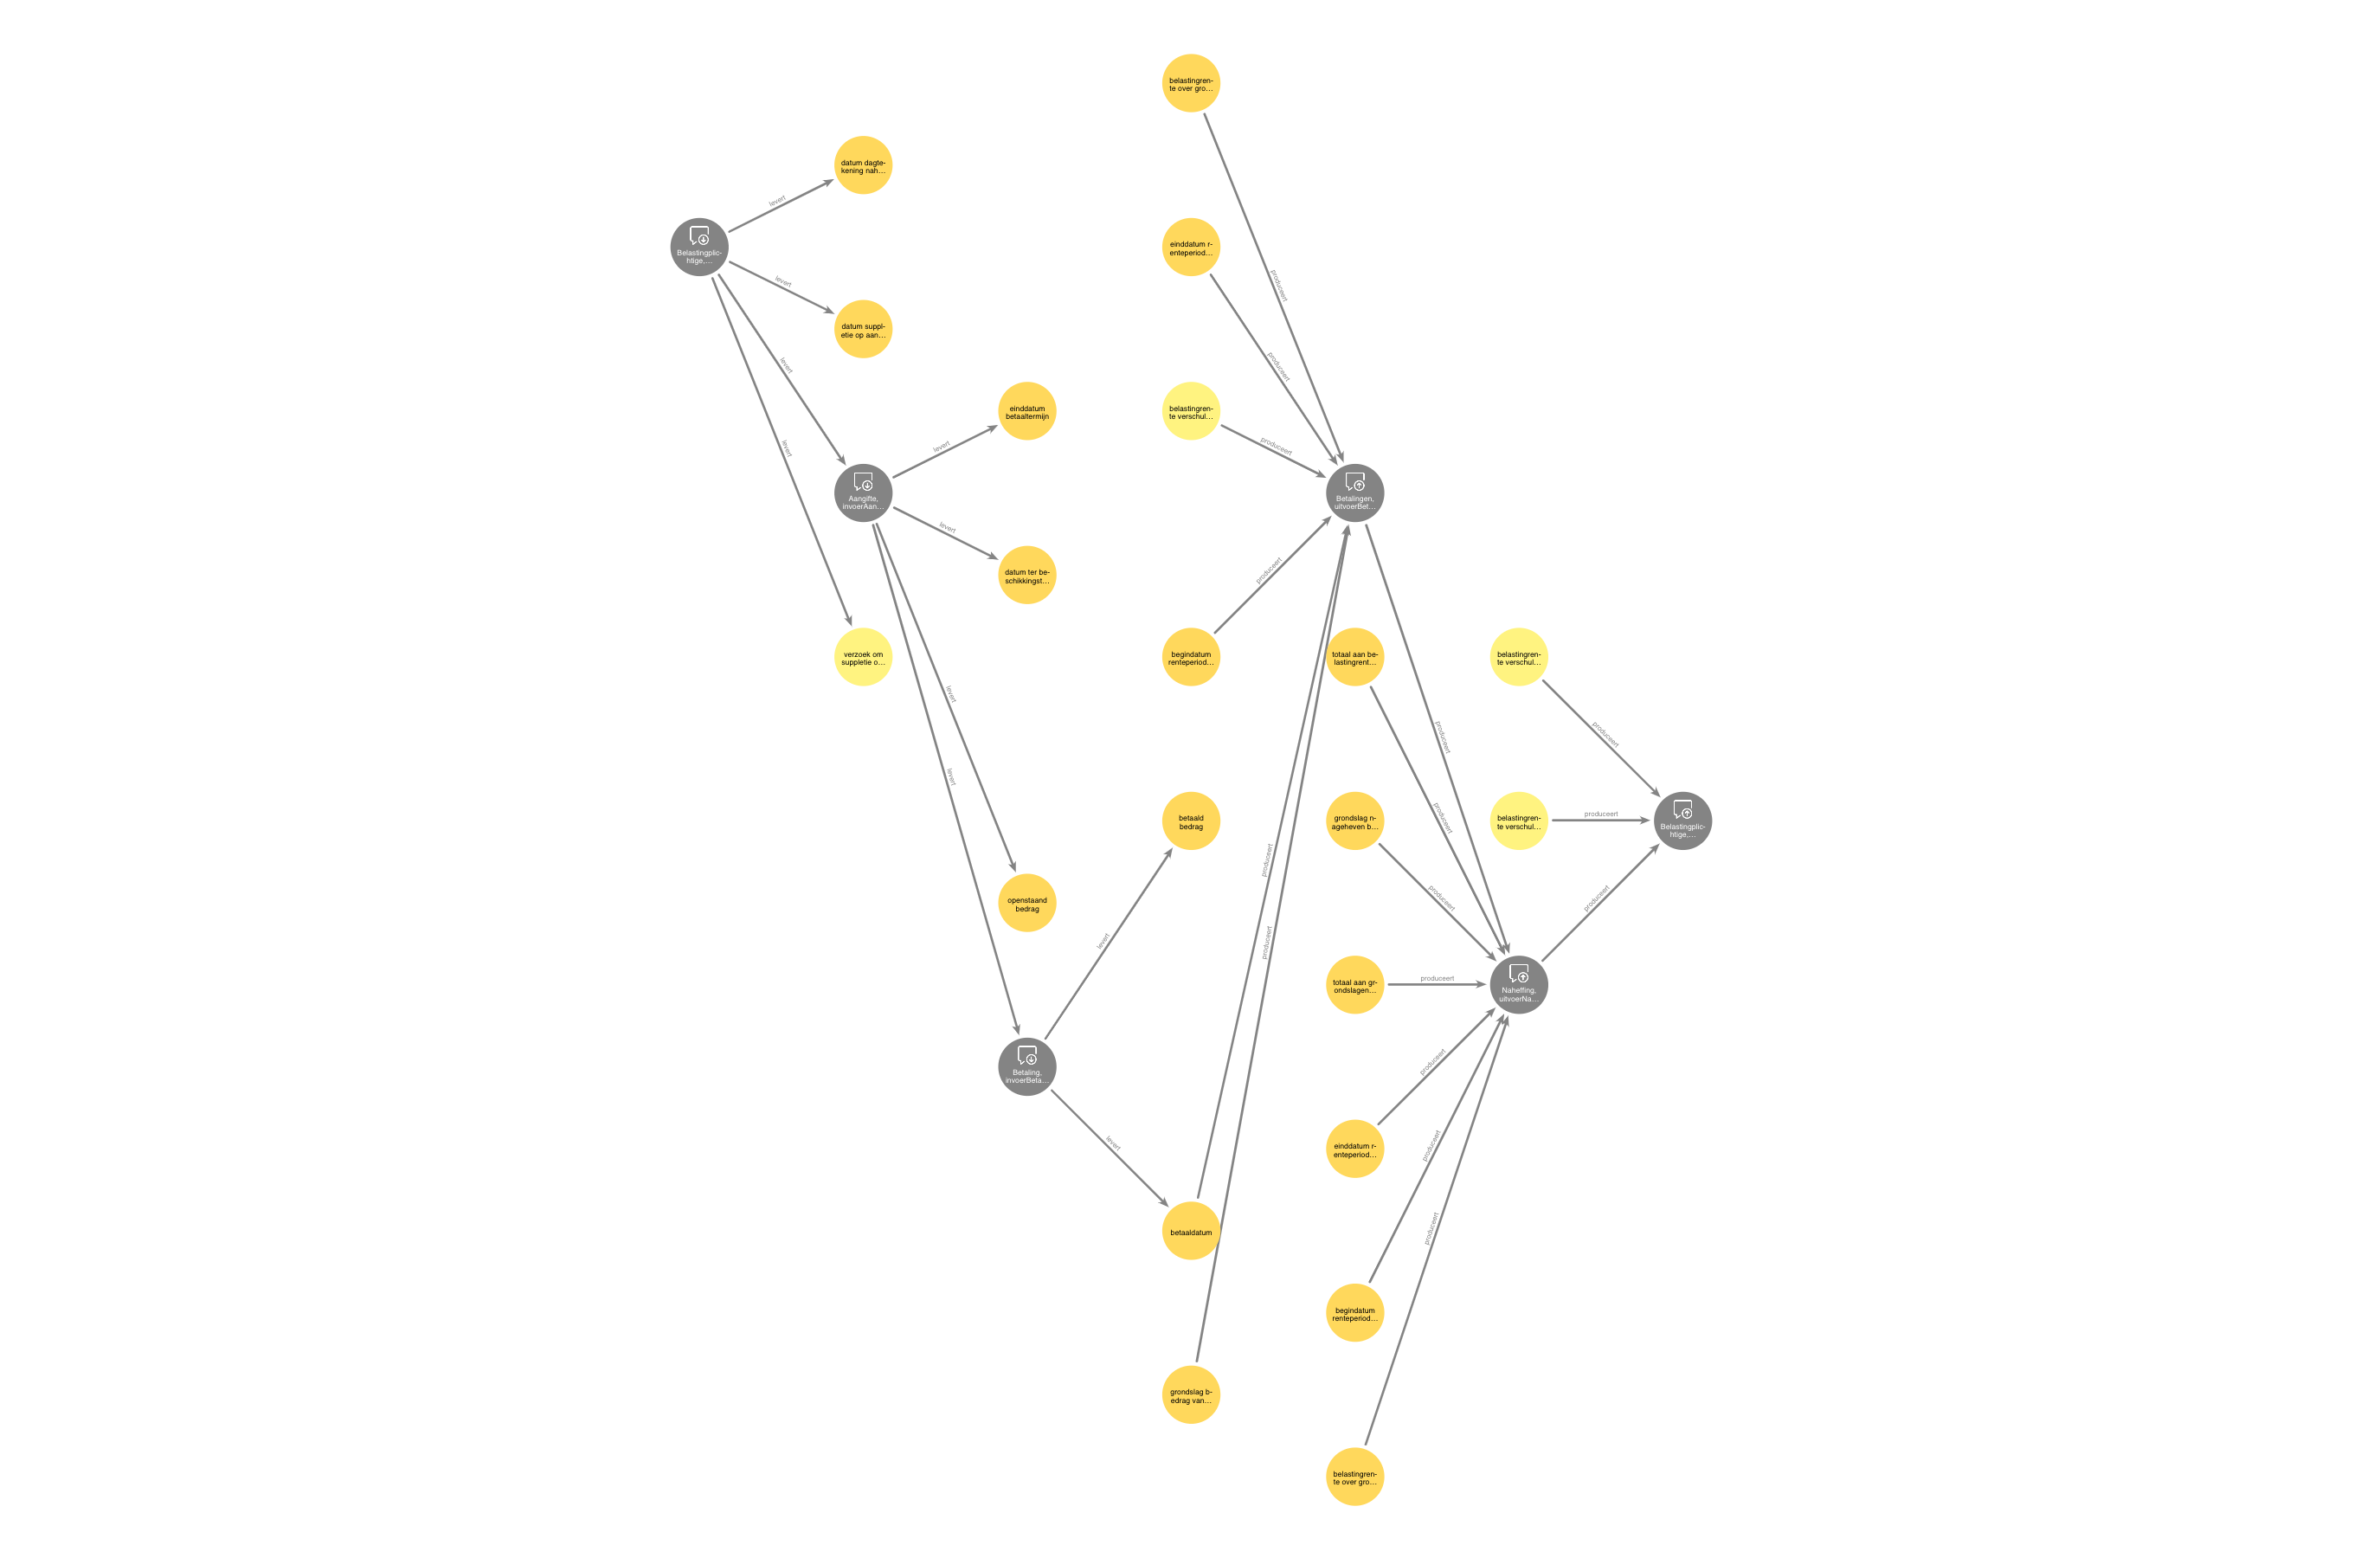

In [7]:
display(HTML("<h3>Wat is het Objectmodel?</h3>"))
display(Image("../explanation_method/media/model_object.png"))

display(HTML("<h3>Wat is het Regelmodel?</h3>"))
display(Image("../explanation_method/media/model_regel.png"))

display(HTML("<h3>Wat is het Servicemodel?</h3>"))
display(Image("../explanation_method/media/model_service.png"))

In [27]:
display(HTML("""
    <div style="display:flex; justify-content:center; align-items:center; flex-wrap:wrap;">
        <div style="margin:10px;">
            <h3>Wat is het Objectmodel?</h3>
            <img src="../explanation_method/media/model_object.png" alt="Objectmodel">
        </div>
        <div style="margin:10px;">
            <h3>Wat is het Regelmodel?</h3>
            <img src="../explanation_method/media/model_regel.png" alt="Regelmodel">
        </div>
        <div style="margin:10px;">
            <h3>Wat is het Servicemodel?</h3>
            <img src="../explanation_method/media/model_service.png" alt="Servicemodel">
        </div>
    </div>
"""))

##### Service checks

In [37]:
display(HTML(f"""
       <div style="display: flex; align-items: stretch; padding:10px; width:60%;">
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:50%">
                     <div style="flex: 1;">
                     <h3> Worden alle in- en uitvoerberichten gebruikt? </h3>
                     </div>
                     <div style="flex: 1;">
                     {ge.path_check_inoutput()} 
                     </div>
                     <br>
                     <br>
                     <div style="flex: 1;">
                     {ge.path_check_inoutput(output_type='html_table')}
                     </div>
              </div>
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:50%">
                     <img src="../explanation_method/media/whether_inoutservice.png"> </img>
              </div>
       </div>

    """))

,Type,Bericht,Path
0,Uitvoer,uitvoerBetalingen,True
1,Uitvoer,uitvoerNaheffing,True
2,Uitvoer,uitvoerBelastingplichtige,True
3,Invoer,invoerAangifte,True
4,Invoer,invoerBetaling,True
5,Invoer,invoerBelastingplichtige,True


In [43]:
display(HTML(f"""
       <div style="display: flex; align-items: stretch; padding:10px; heigh:100%;">
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:40%">
                     <div style="flex: 1;">
                            <h3> Worden alle invoervariabelen gebruikt om iets voor de uitvoer te berekenen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {ge.service_check_input()} 
                     </div>
                     <br>
                     <div style="flex: 1;">
                            {ge.service_check_input(output_type='html_table')}
                     </div>
                     <br>
                     <div style="flex: 1;">
                            <h3> Kunnen alle uitvoervariabelen worden berekend, gegeven de invoervariabelen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {ge.service_check_output()} 
                     </div>
                     <br>
                     <div style="flex: 1;">
                            {ge.service_check_output(output_type='html_table')}
                     </div>
              </div>
              <img src="../explanation_method/media/whether_paths.png", style="width:60%"> </img>
       </div>
    """))

,Invoer,Variabele,Path
0,Aangifte,einddatum betaaltermijn,True
1,Aangifte,openstaand bedrag,True
2,Aangifte,datum ter beschikkingstelling dividend,True
3,Betaling,betaaldatum,True
4,Betaling,betaald bedrag,True
5,Belastingplichtige,datum dagtekening naheffing,True
6,Belastingplichtige,datum suppletie op aangifte,True
7,Belastingplichtige,verzoek om suppletie op aangifte,True
,Uitvoer,Variabele,Path
0,Betalingen,belastingrente verschuldigd wegens te late betaling,True


In [44]:
display(HTML(f"""
       <div style="display: flex; align-items: stretch; padding:10px; heigh:100%;">
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:40%">
                     <div style="flex: 1;">
                            <h3> Worden alle variabelen gebruikt? </h3>
                     </div>
                     <div style="flex: 1;">
                            {ge.path_check_variables()} 
                     </div>
                     <br>
                     <br>
                     <div style="flex: 1;">
                            {ge.path_check_variables(output_type='html_table')}
                     </div>
              </div>
              <img src="../explanation_method/media/whether_paths.png", style="width:50%"> </img>
       </div>
    """))

,Object,Variabele,Path
0,Betaling,betaald na 1e kwartaal van kalenderjaar volgend op jaar van ter beschikkingstelling dividend,Voorwaarde
1,Betaling,betaaldatum,Voorwaarde
2,Betaling,grondslag bedrag van de te laat betaalde belasting,Berekening
3,Betaling,tijdig betaald,Voorwaarde
4,Betaling,begindatum renteperiode te laat betaalde belasting,Uitvoer
5,Betaling,belastingrente over grondslag bedrag van de te laat betaalde belasting,Berekening
6,Betaling,betaald bedrag,Berekening
7,Betaling,einddatum renteperiode te laat betaalde belasting,Uitvoer
8,Betaling,belastingrente verschuldigd wegens te late betaling,Voorwaarde
9,Aangifte,datum ter beschikkingstelling dividend,Berekening


In [11]:
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; padding:10px;">
              <div style="display: flex; flex-direction: column; justify-content: flex-start; width:40%">
                     <div style="flex: 1;">
                            <h3> Worden alle variabelen toegekend? </h3>
                     </div>
                     <div style="flex: 1;">
                            {ge.assignment_check_variables()} 
                     </div>
                     <br>
                     <br>
                     <div style="flex: 1;">
                            {ge.assignment_check_variables(output_type='html_table')}
                     </div>
              </div>
              <img src="../explanation_method/media/whether_assignment_variabelen.png", style="width:60%;"> </img>
       </div>
    """))

,Naam,Assignment
0,grondslag bedrag van de te laat betaalde belasting,Regel
1,einddatum renteperiode te laat betaalde belasting,Geen assignment
2,belastingrente over grondslag bedrag van de te laat betaalde belasting,Regel
3,betaaldatum,Invoer
4,1 januari van het jaar volgend op het jaar waarin dividend ter beschikking is gesteld,Regel
5,totaal aan grondslagen te late betalingen,Regel
6,belastingrente over grondslag nageheven belasting,Regel
7,1 april van het jaar volgend op het jaar waarin dividend ter beschikking is gesteld,Regel
8,begindatum renteperiode te laat betaalde belasting,Geen assignment
9,betaald bedrag,Invoer


#### Logic checks

In [12]:
display(HTML(ge.logic_check_rules()))
display(HTML(ge.logic_check_rules(output_type='html_table')))

,Regel,VariabeleInConditie,AantalPaden
0,Begindatum renteperiode nageheven belasting 01,belastingrente verschuldigd wegens niet (volledig) betalen,1
1,Aangifte volledig betaald 01,openstaand bedrag,1
2,Betaling tijdig betaald 01,betaaldatum,1
3,Betaling tijdig betaald 01,einddatum betaaltermijn,1
4,Totaal aan belastingrente over totaal grondslagen te late betalingen 01,belastingrente verschuldigd wegens te late betaling,1
5,Vast te stellen naheffingsaanslag 02,1 april van het jaar volgend op het jaar waarin dividend ter beschikking is gesteld,1
6,Belastingrente verschuldigd 02,volledig betaald,1
7,Belastingrente verschuldigd 02,tijdige suppletie op aangifte gedaan,1
8,Belastingrente verschuldigd 02,verzoek om suppletie op aangifte,1
9,Belastingrente verschuldigd 02,vastgesteld op of na 1 april in het kalenderjaar volgend op het kalenderjaar waarin dividend ter beschikking is gesteld,1


### Explanation - Explainer

#### Data

In [13]:
rule_amount = 6
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Welke beslissingen heeft het systeem genomen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {le.what_decisions()} 
                     </div>
                     <br>
                     <div style="flex: 1;">
                            <h3> Welke (persoonlijke) informatie is gebruikt voor deze beslissingen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {le.what_personal_data()} 
                     </div>
              </div>
              <div style="flex: 1; display: flex; flex-direction: column; justify-content: flex-start; width:50%; padding:10px; overflow: hidden;">
                     <div style="flex: 1;">
                            <h3> Welke regels zijn gebruikt voor deze beslissingen? </h3>
                     </div>
                     <div style="flex: 1;">
                            {"<br>".join([html.data for html in le.what_rules()[:rule_amount]])} 
                     </div>
              </div>
       </div>
    """))

,Uitvoer,Variabele,Waarde
0,Betalingen,belastingrente over grondslag bedrag van de te laat betaalde belasting van de Betaling,8
1,Naheffing,totaal aan belastingrente over totaal grondslagen te late betalingen van de Vast te stellen naheffingsaanslag,8
2,Betalingen,grondslag bedrag van de te laat betaalde belasting van de Betaling,100
3,Betalingen,belastingrente verschuldigd wegens te late betaling van de Betaling,Waar
4,Naheffing,grondslag nageheven belasting van de Vast te stellen naheffingsaanslag,1000
5,Naheffing,totaal aan grondslagen te late betalingen van de Vast te stellen naheffingsaanslag,100
6,Belastingplichtige,belastingrente verschuldigd wegens niet (volledig) betalen van de Belastingplichtige,Waar
7,Naheffing,belastingrente over grondslag nageheven belasting van de Vast te stellen naheffingsaanslag,80
8,Belastingplichtige,belastingrente verschuldigd wegens te late betaling van de Belastingplichtige,Waar
9,Naheffing,begindatum renteperiode nageheven belasting van de Vast te stellen naheffingsaanslag,2022-01-01


#### Reasoning

In [14]:
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom zijn deze beslissingen gemaakt? </h3>
                     </div>
                     <br>
                     <img src="../explanation_method/media/why_local.png", style="width:100%; margin:-2%;"> </img>
              </div>
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom zijn deze beslissingen gemaakt? (filtered) </h3>
                     </div>
                     <img src="../explanation_method/media/why_local_filtered.png", style="width:100%; margin:-2%;"> </img>
              </div> 
       </div>
       
    """))




In [15]:
# Why is this decision made?
why_decision = 'belastingrente verschuldigd wegens te late betaling' #CHANGEABLE
why_object = 'Belastingplichtige'

# Why is not that decision made? NOTE: only works for unsigned values
why_not_decision = 'volledig betaald' #CHANGEABLE
why_not_object = 'Aangifte'

# What?
what_variabele = "openstaand bedrag"
what_object = "Aangifte"

In [16]:
display(HTML(f"""
       <div style="flex-direction: column; justify-content: flex-start; width:100%; padding:10px;">
              <div style="flex: 1;">
                     <h3> Waarom zijn deze beslissingen gemaakt? </h3>
              </div>
              <br>
              <img src="../explanation_method/media/why_local.png", style="width:100%; margin:-2%;"> </img>
       </div>
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom is de {why_object} {why_decision}? </h3>
                     </div>
                     <div style="flex: 1;">
                            {"<br>".join([html.data for html in le.why_decision(why_decision, why_object)])} 
                     </div>
                     <br>
                     <img src="../explanation_method/media/why_telatebetaling.png", style="width:100%; "> </img>
              </div>
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom is de {why_object} {why_decision}? (Trace) </h3>
                     </div>
                     <div>
                            {"<br>".join([html.data for html in le.why_paths(why_decision, why_object)])} 
                     </div>
              </div> 
       </div>
       <img src="../explanation_method/media/why_telatebetaling_paths.png", style="width:100%; margin-top:-20%; margin-bottom:-10%;"> </img>
    """))

In [17]:
display(HTML(f"""
       <div style="display: flex; align-items: flex-start; width:100%; padding:10px;">
              <div style="flex-direction: column; justify-content: flex-start; width:50%; padding:10px;">
                     <div style="flex: 1;">
                            <h3> Waarom is de {why_not_object} niet {why_not_decision}? </h3>
                     </div>
                     <div style="flex: 1;">
                            {"<br>".join([html.data for html in le.why_decision(why_not_decision, why_not_object, negative=True)])} 
                     </div>
                     <br>
                     <img src="../explanation_method/media/why_not_volledigbetaald_blured.png", style="width:100%; margin:-10%;"> </img>
                     <div style="flex: 1;">
                            <h3>  Wat is het {what_variabele} van de {what_object}? </h3>
                     </div>
                     <div style="flex: 1;">
                            {le.what(what_variabele, what_object)} 
                     </div>
              </div> 
    """))

# What if?
# NOTE: not implemented, as explanation method does not re-calculate itself and there is no live integration.